In [1]:
import pandas as pd
from random import choices
from numpy.random import poisson
from numpy import mean
import seaborn as sns
import matplotlib.pyplot as plt

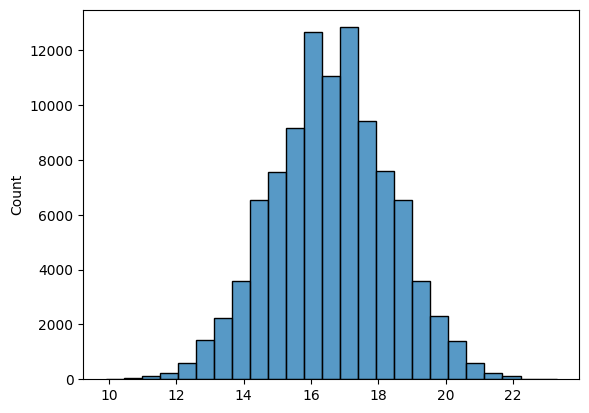

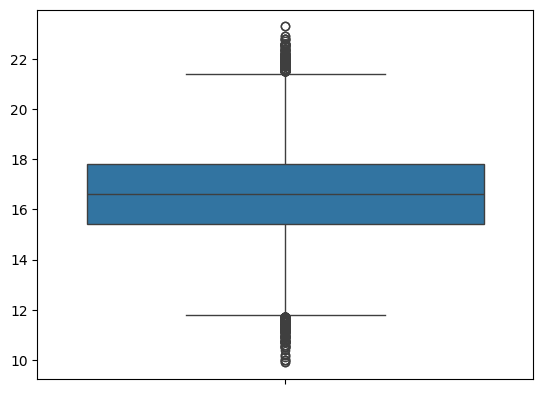

count    100000.000000
mean         16.604188
std           1.758930
min           9.900000
25%          15.400000
50%          16.600000
75%          17.800000
max          23.300000
dtype: float64


In [2]:
GP = poisson(lam=15, size=100)
x = choices(list(set(GP)), k=10)
data = []
for i in range(100_000):
    y = choices(x, k=10)
    data.append(mean(y))

data = pd.Series(data)

sns.histplot(data, bins=25)
plt.show()
sns.boxplot(data)
plt.show()
print(data.describe())

In [3]:
def estimator(x):
    return max(x)

def JN_bias_correction(x, estimator):
    n = len(x)

    theta_stars = []
    for elem in x:
        q = x.copy()
        q.remove(elem)
        theta_stars.append(estimator(q))

    theta_hat = estimator(x)
    theta_dot = np.mean(theta_stars)

    bias_jack = (theta_dot - theta_hat) * (n-1)
    theta_hat_jack = theta_hat - bias_jack
    return theta_hat_jack


data = []
for k in range(5, 100):
    for _ in range(1000):
        x = choices([i for i in range(1, 400)], k=k)
        data.append((k, estimator(x), JN_bias_correction(x, estimator)))

df = pd.DataFrame(data)
df = df.groupby(0).agg(['mean'])

sns.scatterplot(data=df[1]['mean'])
sns.scatterplot(data=df[2]['mean'])
plt.axhline(400, color='red')

NameError: name 'np' is not defined